In [1]:
import re

# Example 1: Git Logs

In [4]:
from subprocess import check_output

In [10]:
output = check_output(["git", "log"])
type(output)

bytes

In [11]:
output = str(output, "utf-8")
print(output[:500])

commit 73410709eb9fe14a8b85c6b4637b4fc3c8b6c26c
Author: Tyler <tharter@wisc.edu>
Date:   Fri Oct 29 17:35:57 2021 +0000

    lec examples

commit 5d7ff04f313616ca2a0ec8432096bea5e146b90e
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Thu Oct 28 06:46:39 2021 +0000

    change readme

commit 8d3f32f02894983d8288829f9e32b2a15f8a360b
Author: yiyins2 <sophia1998shen@gmail.com>
Date:   Thu Oct 28 06:35:35 2021 +0000

    p5 modified

commit b678be6acdec95093b9dea3826d265b2e25291ef
Author: yiyins2


In [ ]:
# things to find:
# 1. commit numbers
# 2. day of week
# 3. author names
# 4. every line mentioning a project

In [14]:
# commits
commits = re.findall(r"[0-9a-f]{32}", output)
commits[:5]

['73410709eb9fe14a8b85c6b4637b4fc3',
 '5d7ff04f313616ca2a0ec8432096bea5',
 '8d3f32f02894983d8288829f9e32b2a1',
 'b678be6acdec95093b9dea3826d265b2',
 '4c5f764ce8eaf949b6bee4cea354c576']

['Fri', 'Thu', 'Thu', 'Thu', 'Wed']


<AxesSubplot:>

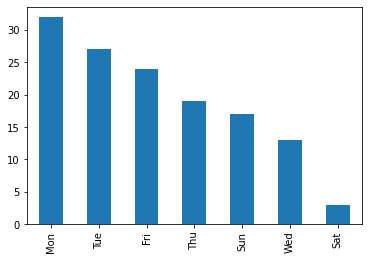

In [20]:
# day of week
#EXAMPLE:
#Date:   Thu Oct 28 06:35:35 2021 +0000
import pandas as pd
days = re.findall(r"Date:\s*(\w+)", output)
print(days[:5])
pd.Series(days).value_counts().plot.bar()

In [26]:
# names
names = re.findall(r"Author:\s*(.+?)\s*<", output)
names[:20]

['Tyler',
 'yiyins2',
 'yiyins2',
 'yiyins2',
 'Tyler',
 'tylerharter',
 'Tyler',
 'Tyler',
 'Tyler',
 'Han Wang',
 'Tyler',
 'Tyler Caraza-Harter',
 'Tyler Caraza-Harter',
 'Tyler Caraza-Harter',
 'Oliver9770',
 'Oliver9770',
 'Oliver9770',
 'tylerharter',
 'tylerharter',
 'Tyler']

In [32]:
# find messages referring to projects
# p1, P1, project 1

matches = re.findall(r"([^\n]*(p|P|Project|project)\d+[^\n]*)", output)
matches[:5]

[('    p5 modified', 'p'),
 ('    release p4', 'p'),
 ('    release p4', 'p'),
 ('    P4: improve testing of SVGs, simplify text', 'P'),
 ('    p4 draft', 'p')]

In [33]:
for match in matches:
    print(match[0].strip())

p5 modified
release p4
release p4
P4: improve testing of SVGs, simplify text
p4 draft
update p3  tester.py to fix WebScraper Error
p3 updates to tester.py and README.md
p3 tester draft
p3 spec draft
p7 draft
edits to p3
p3 edits
p2 fix: generators not lists
320 post p2 hints video
release p2
P2: use Node instead of dict, other revisions
p2 draft completed
p1 submission directions
p1 submission directions
release P1
release P1
p1 draft
p5 draft
p6 draft
p1, part 1
p3 draft
P2 draft


# Example 2: Contacting People

In [36]:
s = """
Debugging help is usually best in person, but if you can't make that, or have another question not well suited to Piazza, feel free to drop us an email:

Tyler [Instructor] - tharter (AT) wisc.edu
Olesia [Head TA] - oelfimova (AT) wisc.edu
Cong [TA] - cding44 (AT) wisc.edu
Bryce [TA] - bcjohnson7 (AT) wisc.edu
Haotian [TA] - hma232 (AT) wisc.edu
Yiyin [TA] - yshen82 (AT) wisc.edu
Hunter [TA] - holson23 (AT) wisc.edu
Han [TA] - hwang638 (AT) wisc.edu
tylerharter@gmail.com
"""
s

"\nDebugging help is usually best in person, but if you can't make that, or have another question not well suited to Piazza, feel free to drop us an email:\n\nTyler [Instructor] - tharter (AT) wisc.edu\nOlesia [Head TA] - oelfimova (AT) wisc.edu\nCong [TA] - cding44 (AT) wisc.edu\nBryce [TA] - bcjohnson7 (AT) wisc.edu\nHaotian [TA] - hma232 (AT) wisc.edu\nYiyin [TA] - yshen82 (AT) wisc.edu\nHunter [TA] - holson23 (AT) wisc.edu\nHan [TA] - hwang638 (AT) wisc.edu\ntylerharter@gmail.com\n"

In [77]:
import requests
resp = requests.get("https://tyler.caraza-harter.com/cs320/f21/contact.html")
resp.raise_for_status() # trigger exception if resp corresponds to a 404 page, etc
s = resp.text
s = re.sub("</?b>", "", s)

In [78]:
opt_brackets = r"[\(\)\[\]\{\}]?"
at = opt_brackets + "(\@|[aA][tT])" + opt_brackets
suffix = "(\.(edu|com|org|net|gov))"
pattern = "(\w+)\s*" + at + "\s*(\w+)" + suffix
for match in re.findall("(" + pattern + ")", s):
    #print(match)
    print(match[1] + "@" + match[3] + match[4])

tharter@wisc.edu
oelfimova@wisc.edu
cding44@wisc.edu
bcjohnson7@wisc.edu
hma232@wisc.edu
yshen82@wisc.edu
holson23@wisc.edu
hwang638@wisc.edu
